## Import the data from the roads which need to be checked for crossings with the N1 and N2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from haversine import haversine, Unit

In [2]:
remaining_roads = pd.read_csv('../data/semi-processed/possible_crossings_to_check.csv')
remaining_roads

Unnamed: 0   road  chainage  LRPName        lat        lon  gap  \
0               0     N1     0.000     LRPS  23.706028  90.443333  NaN   
1               1     N1     0.814    LRPSa  23.702917  90.450417  NaN   
2               2     N1     0.822    LRPSb  23.702778  90.450472  NaN   
3               3     N1     1.000   LRP001  23.702139  90.451972  NaN   
4               4     N1     2.000   LRP002  23.697889  90.460583  NaN   
...           ...    ...       ...      ...        ...        ...  ...   
29982       51269  Z8913    23.000   LRP023  22.360750  90.832777  NaN   
29983       51270  Z8913    23.088  LRP023a  22.361500  90.832833  NaN   
29984       51271  Z8913    24.000   LRP024  22.368916  90.836639  NaN   
29985       51272  Z8913    25.000   LRP025  22.377305  90.839972  NaN   
29986       51273  Z8913    25.500  LRP025a  22.382083  90.841611  NaN   

            type                                               name  
0         Others  Start of Road  after Jatrabari Flyover infront...  
1        Culvert                                        Box Culvert  
2      CrossRoad                            Intersection with Z1101  
3         KmPost                                    Km post missing  
4         KmPost                                    Km post missing  
...          ...                                                ...  
29982     KmPost                                    Km post missing  
29983    Culvert                                        Sluice gate  
29984     KmPost                                    Km post missing  
29985     KmPost                                    Km post Missing  
29986     Others                             Road Wash out by river  

[29987 rows x 9 columns]

In [3]:
# Make a list of the remaining roads
remaining_roads_list = list(set(remaining_roads.road.to_list()))
remaining_roads_list

['Z4011',
 'Z1412',
 'Z3025',
 'N502',
 'Z7404',
 'N401',
 'Z3709',
 'Z2003',
 'Z2802',
 'R141',
 'R890',
 'Z5202',
 'N809',
 'Z5049',
 'N1',
 'Z3601',
 'Z6021',
 'Z1429',
 'N702',
 'Z8034',
 'Z6802',
 'Z5621',
 'Z5554',
 'N8',
 'R880',
 'Z7461',
 'R556',
 'Z5046',
 'R315',
 'Z3032',
 'Z8037',
 'Z6813',
 'N507',
 'Z6006',
 'Z1811',
 'R604',
 'Z1422',
 'R371',
 'N709',
 'Z5010',
 'R748',
 'Z7024',
 'Z1206',
 'Z7615',
 'Z7617',
 'R601',
 'R745',
 'Z8806',
 'Z4021',
 'Z7606',
 'R749',
 'R747',
 'R544',
 'Z8052',
 'Z5209',
 'R585',
 'Z8043',
 'Z1098',
 'Z5018',
 'Z4018',
 'R771',
 'Z6004',
 'Z3037',
 'Z5001',
 'Z7012',
 'Z1405',
 'Z1612',
 'Z5622',
 'R720',
 'Z1441',
 'Z5015',
 'Z4022',
 'Z8603',
 'Z5456',
 'Z8913',
 'Z1510',
 'Z5002',
 'Z6809',
 'R152',
 'N106',
 'Z4801',
 'Z7030',
 'Z7602',
 'Z1813',
 'Z5072',
 'Z5035',
 'Z5706',
 'R163',
 'Z4606',
 'Z5025',
 'Z1608',
 'R313',
 'Z2044',
 'Z6031',
 'R545',
 'Z5855',
 'Z5075',
 'Z6806',
 'R312',
 'N704',
 'R760',
 'Z2834',
 'Z5552',
 'N806

In [4]:
# Convert the road lists into a nested list 
remaining_roads_nested = [remaining_roads_list[i:i+6] for i in range(0, len(remaining_roads_list), 6)]
remaining_roads_nested

[['Z4011', 'Z1412', 'Z3025', 'N502', 'Z7404', 'N401'],
 ['Z3709', 'Z2003', 'Z2802', 'R141', 'R890', 'Z5202'],
 ['N809', 'Z5049', 'N1', 'Z3601', 'Z6021', 'Z1429'],
 ['N702', 'Z8034', 'Z6802', 'Z5621', 'Z5554', 'N8'],
 ['R880', 'Z7461', 'R556', 'Z5046', 'R315', 'Z3032'],
 ['Z8037', 'Z6813', 'N507', 'Z6006', 'Z1811', 'R604'],
 ['Z1422', 'R371', 'N709', 'Z5010', 'R748', 'Z7024'],
 ['Z1206', 'Z7615', 'Z7617', 'R601', 'R745', 'Z8806'],
 ['Z4021', 'Z7606', 'R749', 'R747', 'R544', 'Z8052'],
 ['Z5209', 'R585', 'Z8043', 'Z1098', 'Z5018', 'Z4018'],
 ['R771', 'Z6004', 'Z3037', 'Z5001', 'Z7012', 'Z1405'],
 ['Z1612', 'Z5622', 'R720', 'Z1441', 'Z5015', 'Z4022'],
 ['Z8603', 'Z5456', 'Z8913', 'Z1510', 'Z5002', 'Z6809'],
 ['R152', 'N106', 'Z4801', 'Z7030', 'Z7602', 'Z1813'],
 ['Z5072', 'Z5035', 'Z5706', 'R163', 'Z4606', 'Z5025'],
 ['Z1608', 'R313', 'Z2044', 'Z6031', 'R545', 'Z5855'],
 ['Z5075', 'Z6806', 'R312', 'N704', 'R760', 'Z2834'],
 ['Z5552', 'N806', 'R211', 'R547', 'R870', 'R314'],
 ['Z1424', 'Z37

In [5]:
# len(remaining_roads_list)/6

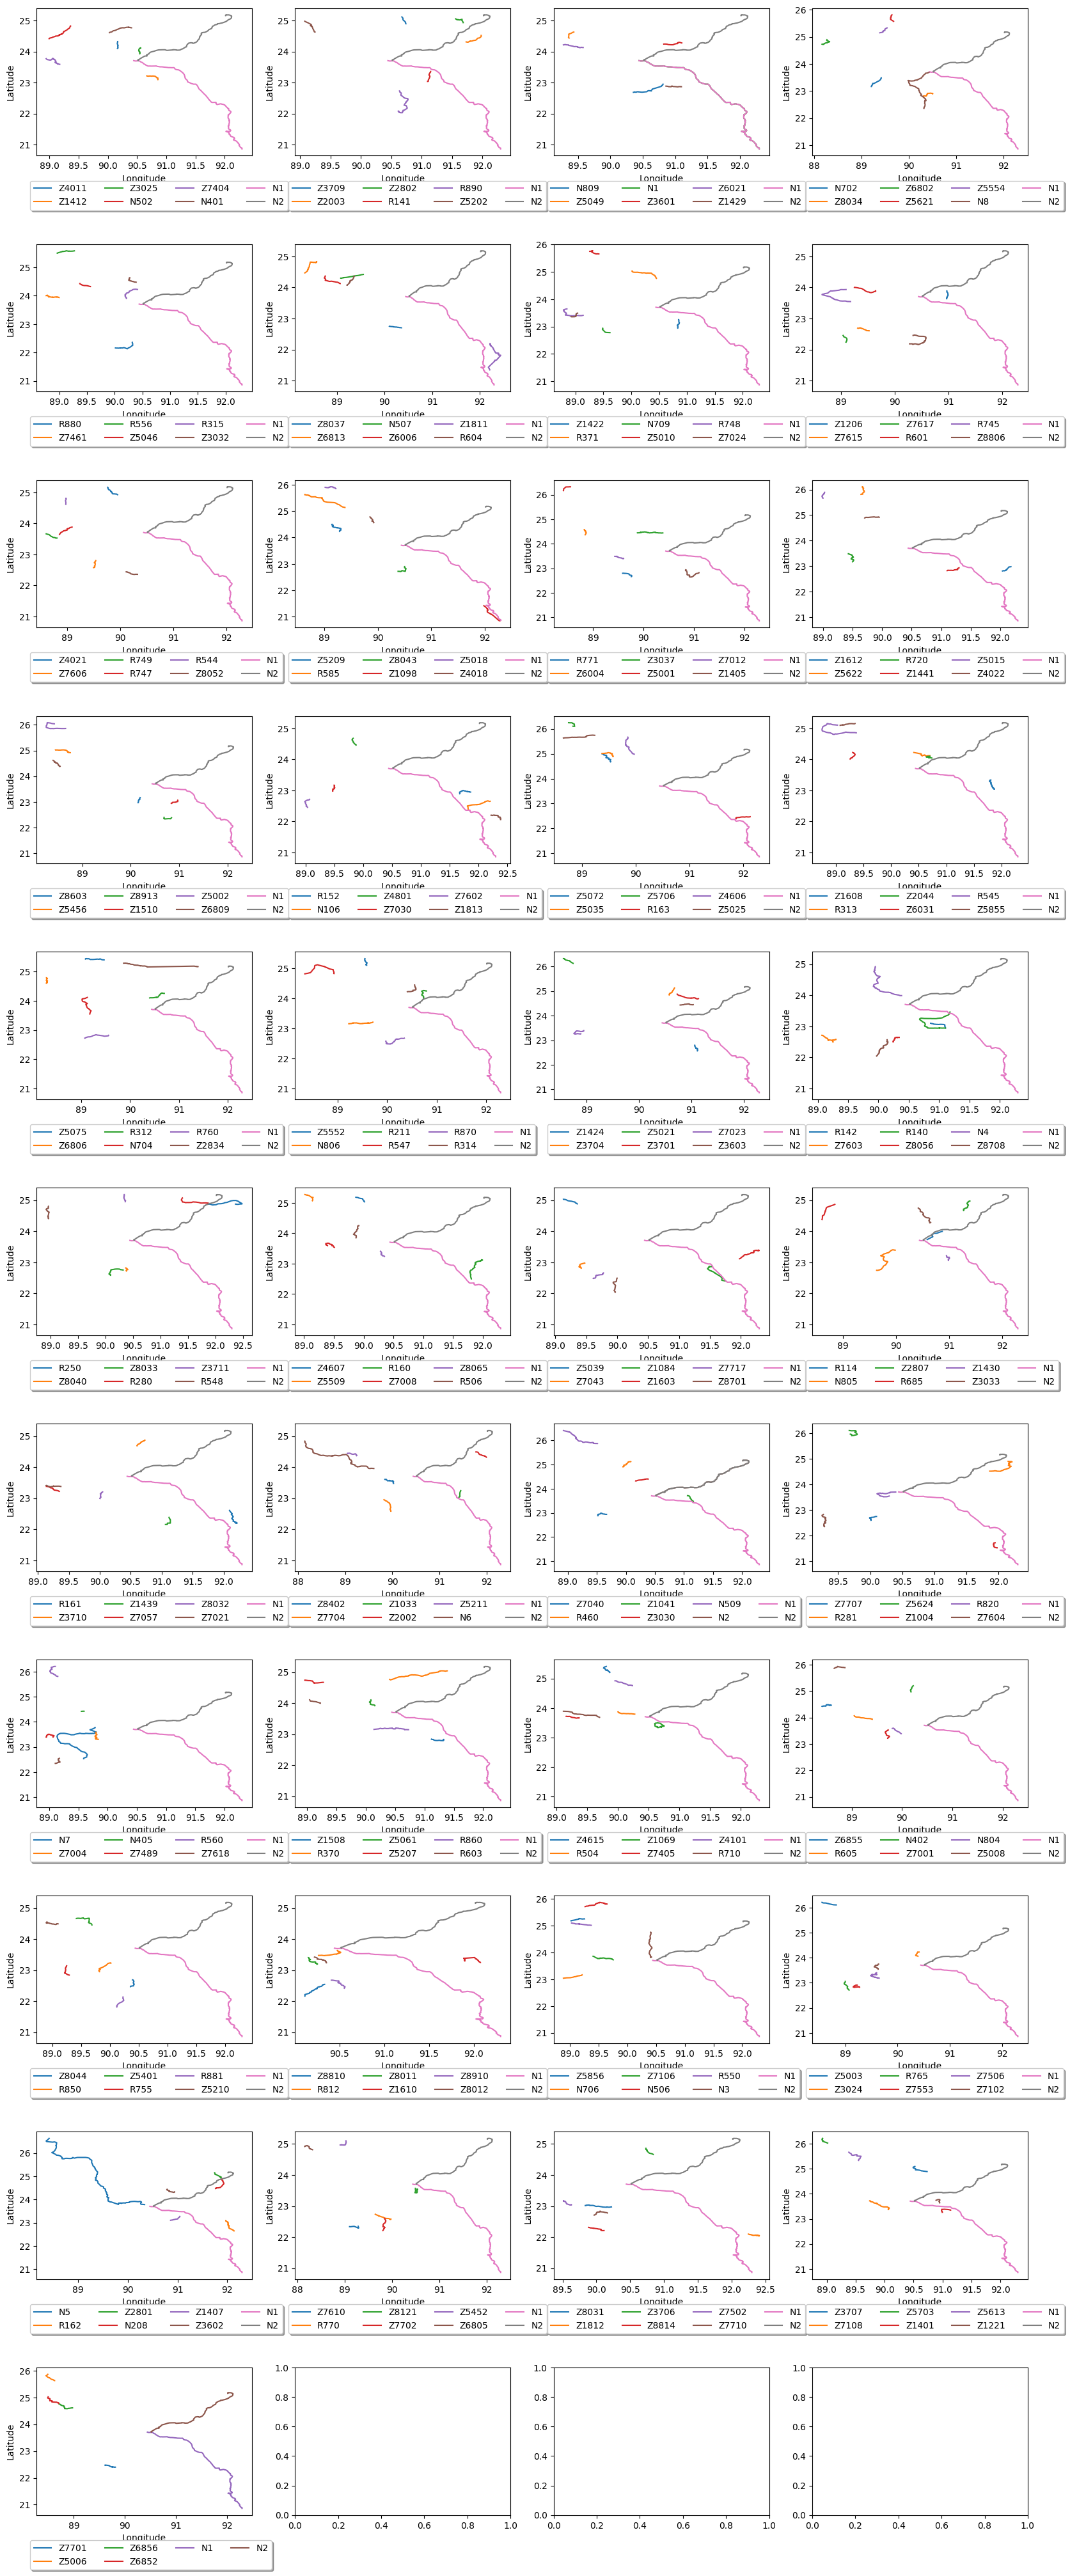

In [6]:
# Plot all of the remaining roads, six at a time, to visually inspect if there are probabable crossings left 
fig, ax = plt.subplots(11,4, figsize=(20,40))

for index, nest in enumerate(remaining_roads_nested, 1):
    plt.subplot(11, 4, index)
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.6, wspace=0.2)
    
    for road in nest:
        plt.plot(remaining_roads[remaining_roads['road']==road]['lon'], remaining_roads[remaining_roads['road']==road]['lat'], label=road)
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        
        
    plt.plot(remaining_roads[remaining_roads['road']=='N1']['lon'], remaining_roads[remaining_roads['road']=='N1']['lat'], label='N1')
    plt.plot(remaining_roads[remaining_roads['road']=='N2']['lon'], remaining_roads[remaining_roads['road']=='N2']['lat'], label='N2')
    plt.legend(loc="lower left", ncol=4, bbox_to_anchor=(-0.05, -0.4),
          fancybox=True, shadow=True)
plt.show()

## Identify possible crossings
After visually checking, a few roads are identified as probable and maybe crossings. These roads will be plot again to see where exactly they are located

In [7]:
# Lists are updated iteratively based on visual inspection
probable_crossings = ['N8', 'R140', 'N106', 'Z1084', 'R250', 'R280', 'R114', 'N1', 'N2']

maybe_crossings = ['Z8121', 'Z3025', 'Z1508', 'Z2801', 'Z1041', 'R160', 'R313', 'R163', 'Z2802', 'Z1069', 'N5', 'Z1441', 'Z1812', 'Z1811', 'Z2044', 'R141', 'Z1004', 'Z1221', 'Z1401', 'R812', 'Z1206', 'R820', 'N3', 'Z2002', 'R152', 'N1', 'N2']

Text(0.5, 1.0, 'Probable crossings')

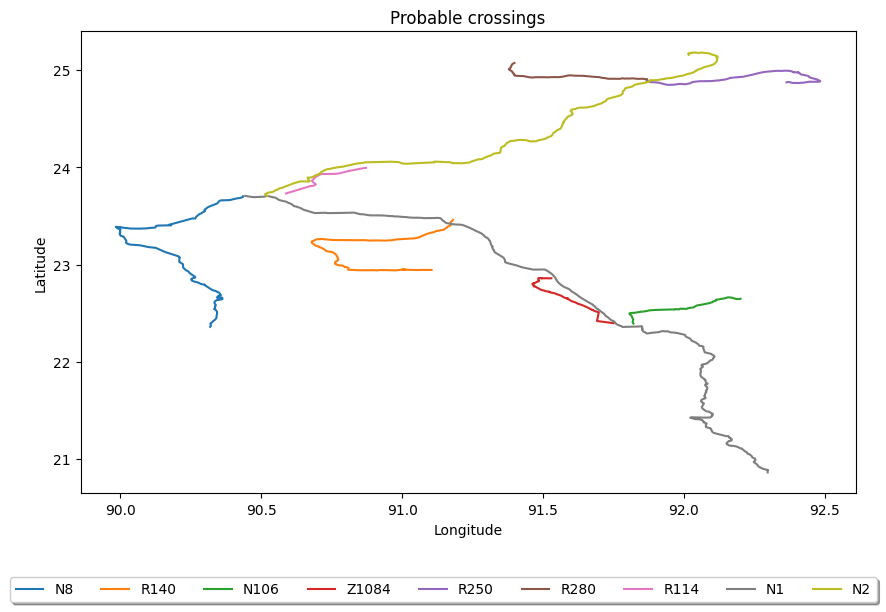

In [8]:
# Plot the probable crossings
plt.figure(figsize=(10,6)) 
for road in probable_crossings:
    plt.plot(remaining_roads[remaining_roads['road']==road]['lon'], remaining_roads[remaining_roads['road']==road]['lat'], label=road)
  
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc="lower left", ncol=len(remaining_roads.columns), bbox_to_anchor=(-0.1, -0.25),
          fancybox=True, shadow=True) 
plt.title('Probable crossings')

The seven identified probable crossings, will be added to the crossings list

Text(0.5, 1.0, 'Maybe crossings')

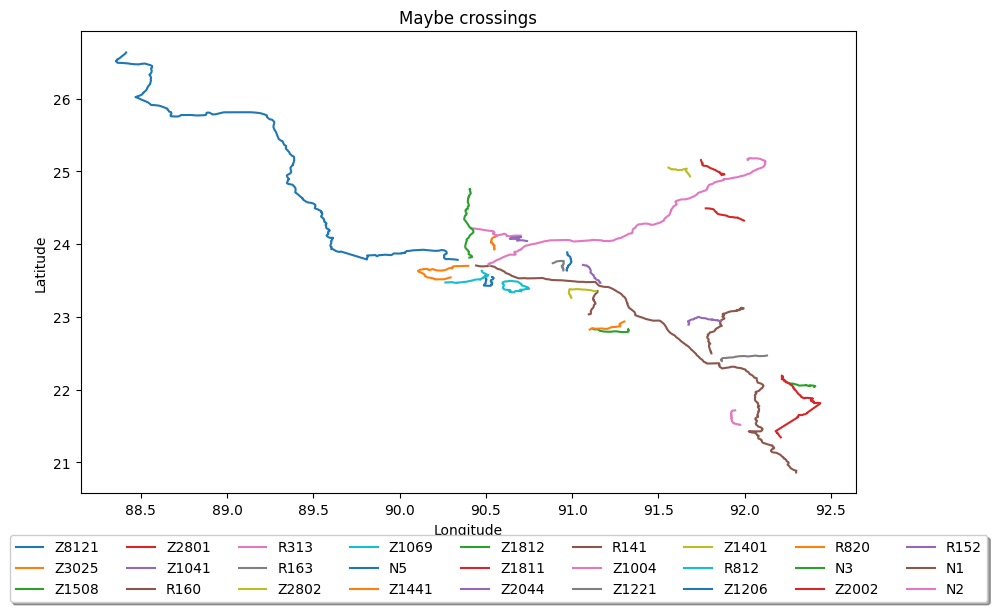

In [9]:
# Plot the maybe crossings
plt.figure(figsize=(10,6)) 
for road in maybe_crossings:
    plt.plot(remaining_roads[remaining_roads['road']==road]['lon'], remaining_roads[remaining_roads['road']==road]['lat'], label=road)
  
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc="lower left", ncol=len(remaining_roads.columns), bbox_to_anchor=(-0.1, -0.25),
          fancybox=True, shadow=True) 
plt.title('Maybe crossings')

The roads identified as maybe crossings with either the N1 or N2, will not be added to the analysis, as they are to far removed

# Identification of probable intersection points

In [10]:
roads = remaining_roads.copy()

In [11]:
# Remove the N1 and N2 from the probable crossings lists 
probable_crossings_road_to = ['N8', 'R140', 'N106', 'Z1084', 'R250', 'R280', 'R114']

In [12]:
probable_crossings_data = []
                          
# Iterate over each road_to in probable_crossings
for road_to in probable_crossings_road_to:
    n1_points = roads[roads['road'] == 'N1']
    n2_points = roads[roads['road'] == 'N2']
    
    # Filter roads DataFrame for the current road_to (smaller road)
    road_to_points = roads[roads['road'] == road_to]
    
    # Find closest points between N1 and road_to
    for index_n1, row_n1 in n1_points.iterrows():
        closest_distance = float('inf')
        closest_point_data = None
        for index_road_to, row_road_to in road_to_points.iterrows():
            distance = haversine((row_n1['lat'], row_n1['lon']), (row_road_to['lat'], row_road_to['lon']), unit=Unit.METERS)
            if distance < closest_distance:
                closest_distance = distance
                closest_point_data = row_road_to
        
        # Collecting the data for the closest pair to the list
        if closest_point_data is not None:
            probable_crossings_data.append({
                'road': row_n1['road'],
                'LRPName': row_n1['LRPName'],
                'lat': row_n1['lat'],
                'lon': row_n1['lon'],
                'chainage':row_n1['chainage'],
                'type':row_n1['type'],
                'road_to': closest_point_data['road'],
                'closest_lrp': closest_point_data['LRPName'],
                'closest_lat': closest_point_data['lat'],
                'closest_lon': closest_point_data['lon'],
                'closest_chainage': closest_point_data['chainage'],
                'closest_type': closest_point_data['type'],
                'closest_name': closest_point_data['name'],
                'distance_to_closest': closest_distance       
            })
    
    # Find closest points between N2 and road_to
    for index_n2, row_n2 in n2_points.iterrows():
        closest_distance = float('inf')
        closest_point_data = None
        for index_road_to, row_road_to in road_to_points.iterrows():
            distance = haversine((row_n2['lat'], row_n2['lon']), (row_road_to['lat'], row_road_to['lon']), unit=Unit.METERS)
            if distance < closest_distance:
                closest_distance = distance
                closest_point_data = row_road_to
        
        # Collect data for the closest pair to the list
        if closest_point_data is not None:
            probable_crossings_data.append({
                'road': row_n2['road'],
                'LRPName': row_n2['LRPName'],
                'lat': row_n2['lat'],
                'lon': row_n2['lon'],
                'chainage':row_n2['chainage'],
                'type':row_n2['type'],
                'road_to': closest_point_data['road'],
                'closest_lrp': closest_point_data['LRPName'],
                'closest_lat': closest_point_data['lat'],
                'closest_lon': closest_point_data['lon'],
                'closest_chainage': closest_point_data['chainage'],
                'closest_type': closest_point_data['type'],
                'closest_name': closest_point_data['name'],
                'distance_to_closest': closest_distance
            })

# Convert list of the df so I can use it
probable_crossings = pd.DataFrame(probable_crossings_data)

probable_crossings

road  LRPName        lat        lon  chainage       type road_to  \
0       N1     LRPS  23.706028  90.443333     0.000     Others      N8   
1       N1    LRPSa  23.702917  90.450417     0.814    Culvert      N8   
2       N1    LRPSb  23.702778  90.450472     0.822  CrossRoad      N8   
3       N1   LRP001  23.702139  90.451972     1.000     KmPost      N8   
4       N1   LRP002  23.697889  90.460583     2.000     KmPost      N8   
...    ...      ...        ...        ...       ...        ...     ...   
15570   N2   LRP287  25.162889  92.017110   285.938     KmPost    R114   
15571   N2  LRP287a  25.161333  92.017277   286.022     Bridge    R114   
15572   N2  LRP287b  25.160972  92.017333   286.060     Bridge    R114   
15573   N2  LRP287c  25.159750  92.017472   286.260    Culvert    R114   
15574   N2     LRPE  25.157056  92.017638   286.516     Others    R114   

      closest_lrp  closest_lat  closest_lon  closest_chainage closest_type  \
0            LRPS    23.702139    90.435361             0.000       Others   
1            LRPS    23.702139    90.435361             0.000       Others   
2            LRPS    23.702139    90.435361             0.000       Others   
3            LRPS    23.702139    90.435361             0.000       Others   
4            LRPS    23.702139    90.435361             0.000       Others   
...           ...          ...          ...               ...          ...   
15570        LRPE    23.994277    90.871777            46.436       Others   
15571        LRPE    23.994277    90.871777            46.436       Others   
15572        LRPE    23.994277    90.871777            46.436       Others   
15573        LRPE    23.994277    90.871777            46.436       Others   
15574        LRPE    23.994277    90.871777            46.436       Others   

                                            closest_name  distance_to_closest  
0      Start of road Infront of Padma CNG Station ,Dh...           919.684490  
1      Start of road Infront of Padma CNG Station ,Dh...          1535.357404  
2      Start of road Infront of Padma CNG Station ,Dh...          1540.210384  
3      Start of road Infront of Padma CNG Station ,Dh...          1691.298112  
4      Start of road Infront of Padma CNG Station ,Dh...          2611.209501  
...                                                  ...                  ...  
15570    End of Road at Raipura and intersect with Z2041        174062.940193  
15571    End of Road at Raipura and intersect with Z2041        173945.555235  
15572    End of Road at Raipura and intersect with Z2041        173919.458751  
15573    End of Road at Raipura and intersect with Z2041        173827.850775  
15574    End of Road at Raipura and intersect with Z2041        173616.684166  

[15575 rows x 14 columns]

In [13]:
# From all of the identified distances, only get the ones which distance is smaller than 500 meters
probable_crossings_500 = probable_crossings[probable_crossings['distance_to_closest']<500]

In [14]:
probable_crossings_500

road  LRPName        lat        lon  chainage  \
2428    N1   LRP094  23.419527  91.171416    91.493   
2429    N1  LRP094a  23.419138  91.172194    91.583   
10961   N2   LRP228  24.877110  91.872944   227.493   
10962   N2  LRP228a  24.877222  91.873527   227.568   
10963   N2  LRP228b  24.877222  91.873722   227.587   
10964   N2  LRP228c  24.877694  91.875277   227.756   
10965   N2   LRP229  24.877849  91.875574   227.793   
10966   N2  LRP229a  24.878666  91.877138   227.988   
10967   N2  LRP229b  24.880194  91.878249   228.186   
10968   N2  LRP229c  24.882749  91.879694   228.504   
14767   N2   LRP037  23.922666  90.703639    36.266   

                                 type road_to closest_lrp  closest_lat  \
2428                           KmPost    R140     LRP004a    23.419166   
2429                        CrossRoad    R140     LRP004a    23.419166   
10961                          KmPost    R250      LRP002    24.879388   
10962                          Bridge    R250      LRP002    24.879388   
10963                          Bridge    R250      LRP002    24.879388   
10964  SideRoad,Left / SideRoad,Right    R250     LRP002a    24.878860   
10965                          KmPost    R250     LRP002a    24.878860   
10966                         Culvert    R250     LRP002a    24.878860   
10967                          Bridge    R250      LRP002    24.879388   
10968                          Bridge    R250      LRP001    24.881833   
14767                          KmPost    R114      LRP028    23.919749   

       closest_lon  closest_chainage closest_type  \
2428     91.172333             4.745    CrossRoad   
2429     91.172333             4.745    CrossRoad   
10961    91.876860             1.315       KmPost   
10962    91.876860             1.315       KmPost   
10963    91.876860             1.315       KmPost   
10964    91.877249             1.389    CrossRoad   
10965    91.877249             1.389    CrossRoad   
10966    91.877249             1.389    CrossRoad   
10967    91.876860             1.315       KmPost   
10968    91.875444             1.000       KmPost   
14767    90.704778            26.789       KmPost   

                          closest_name  distance_to_closest  
2428   Intersection N1 at Paduar Bazar           101.789456  
2429   Intersection N1 at Paduar Bazar            14.505865  
10961                  Golapganj 15 km           469.307508  
10962                  Golapganj 15 km           413.648937  
10963                  Golapganj 15 km           397.863741  
10964                   N2 (Over pass)           237.503563  
10965                   N2 (Over pass)           203.014909  
10966                   N2 (Over pass)            24.348922  
10967                  Golapganj 15 km           166.294850  
10968                  Km post missing           440.660341  
14767                  Km post missing           344.363315

In [15]:
# Find the index of the row with the smallest distance for each set of roads
min_distances_indices = probable_crossings.groupby(['road', 'road_to'])['distance_to_closest'].idxmin()

#Only keep the index of the rows with the smallest distance
probable_crossings_filtered = probable_crossings.loc[min_distances_indices]
probable_crossings_filtered

road  LRPName        lat        lon  chainage            type road_to  \
5016    N1   LRP245  22.364611  91.850833   241.456          KmPost    N106   
0       N1     LRPS  23.706028  90.443333     0.000          Others      N8   
13378   N1  LRP012c  23.690416  90.546583    11.936  SideRoad,Right    R114   
2429    N1  LRP094a  23.419138  91.172194    91.583       CrossRoad    R140   
9088    N1   LRP086  23.476722  91.136444    83.829          KmPost    R250   
11142   N1  LRP009a  23.706083  90.521527     8.763   SideRoad,Left    R280   
7224    N1  LRP231a  22.399611  91.757333   228.406  SideRoad,Right   Z1084   
6059    N2  LRP100a  24.047222  91.235861    99.585         Culvert    N106   
1344    N2   LRP003  23.723666  90.513667     2.166          KmPost      N8   
14767   N2   LRP037  23.922666  90.703639    36.266          KmPost    R114   
3564    N2     LRPS  23.705917  90.521444     0.000          Others    R140   
10966   N2  LRP229a  24.878666  91.877138   227.988         Culvert    R250   
13200   N2  LRP231c  24.895166  91.880166   230.174         Culvert    R280   
8277    N2   LRP098  24.040750  91.210500    96.891          KmPost   Z1084   

      closest_lrp  closest_lat  closest_lon  closest_chainage closest_type  \
5016         LRPS    22.393555    91.821583             0.000       Others   
0            LRPS    23.702139    90.435361             0.000       Others   
13378        LRPS    23.731472    90.587861             0.000       Others   
2429      LRP004a    23.419166    91.172333             4.745    CrossRoad   
9088      LRP002c    24.876110    91.881666             1.948      Culvert   
11142      LRP051    24.942583    91.400389            50.690       KmPost   
7224         LRPE    22.397583    91.750917            70.593       Others   
6059       LRP063    22.663139    92.157889            60.615       KmPost   
1344         LRPS    23.702139    90.435361             0.000       Others   
14767      LRP028    23.919749    90.704778            26.789       KmPost   
3564       LRP063    23.260278    90.698639            63.405       KmPost   
10966     LRP002a    24.878860    91.877249             1.389    CrossRoad   
13200        LRPS    24.905056    91.869888             0.000       Others   
8277       LRP005    22.861472    91.484527             5.000       KmPost   

                                            closest_name  distance_to_closest  
5016                    Start of Road  from Oxygen  More          4404.972047  
0      Start of road Infront of Padma CNG Station ,Dh...           919.684490  
13378  Road Start at Intersection of N 105 &  R 114 a...          6204.920801  
2429                     Intersection N1 at Paduar Bazar            14.505865  
9088                                         Box Culvert        172995.294912  
11142                                    Km post missing        163809.643382  
7224                      The road ends connecting Z1016           697.136864  
6059                                      Rangamati 7 km        180402.163447  
1344   Start of road Infront of Padma CNG Station ,Dh...          8323.711168  
14767                                    Km post missing           344.363315  
3564                                       Chandpur 5 km         52745.193746  
10966                                     N2 (Over pass)            24.348922  
13200          Road start from Z2801 at Amberkhana point          1511.212552  
8277                                     Km post missing        134076.103427

In [16]:
# For each identified distance smaller than 500 meters, check it that is also the sortest distance of that road, if so, drop it from the dataframe
probable_crossings_extra = probable_crossings_500.copy() 
for index in probable_crossings_extra.index:
    if index in probable_crossings_filtered.index:
        probable_crossings_extra.drop(index, inplace=True)   

probable_crossings_extra

road  LRPName        lat        lon  chainage  \
2428    N1   LRP094  23.419527  91.171416    91.493   
10961   N2   LRP228  24.877110  91.872944   227.493   
10962   N2  LRP228a  24.877222  91.873527   227.568   
10963   N2  LRP228b  24.877222  91.873722   227.587   
10964   N2  LRP228c  24.877694  91.875277   227.756   
10965   N2   LRP229  24.877849  91.875574   227.793   
10967   N2  LRP229b  24.880194  91.878249   228.186   
10968   N2  LRP229c  24.882749  91.879694   228.504   

                                 type road_to closest_lrp  closest_lat  \
2428                           KmPost    R140     LRP004a    23.419166   
10961                          KmPost    R250      LRP002    24.879388   
10962                          Bridge    R250      LRP002    24.879388   
10963                          Bridge    R250      LRP002    24.879388   
10964  SideRoad,Left / SideRoad,Right    R250     LRP002a    24.878860   
10965                          KmPost    R250     LRP002a    24.878860   
10967                          Bridge    R250      LRP002    24.879388   
10968                          Bridge    R250      LRP001    24.881833   

       closest_lon  closest_chainage closest_type  \
2428     91.172333             4.745    CrossRoad   
10961    91.876860             1.315       KmPost   
10962    91.876860             1.315       KmPost   
10963    91.876860             1.315       KmPost   
10964    91.877249             1.389    CrossRoad   
10965    91.877249             1.389    CrossRoad   
10967    91.876860             1.315       KmPost   
10968    91.875444             1.000       KmPost   

                          closest_name  distance_to_closest  
2428   Intersection N1 at Paduar Bazar           101.789456  
10961                  Golapganj 15 km           469.307508  
10962                  Golapganj 15 km           413.648937  
10963                  Golapganj 15 km           397.863741  
10964                   N2 (Over pass)           237.503563  
10965                   N2 (Over pass)           203.014909  
10967                  Golapganj 15 km           166.294850  
10968                  Km post missing           440.660341

In [17]:
probable_crossings_trustworthy_filtered = probable_crossings_filtered[probable_crossings_filtered['distance_to_closest']<1000]

In [18]:
probable_crossings_trustworthy_filtered

road  LRPName        lat        lon  chainage            type road_to  \
0       N1     LRPS  23.706028  90.443333     0.000          Others      N8   
2429    N1  LRP094a  23.419138  91.172194    91.583       CrossRoad    R140   
7224    N1  LRP231a  22.399611  91.757333   228.406  SideRoad,Right   Z1084   
14767   N2   LRP037  23.922666  90.703639    36.266          KmPost    R114   
10966   N2  LRP229a  24.878666  91.877138   227.988         Culvert    R250   

      closest_lrp  closest_lat  closest_lon  closest_chainage closest_type  \
0            LRPS    23.702139    90.435361             0.000       Others   
2429      LRP004a    23.419166    91.172333             4.745    CrossRoad   
7224         LRPE    22.397583    91.750917            70.593       Others   
14767      LRP028    23.919749    90.704778            26.789       KmPost   
10966     LRP002a    24.878860    91.877249             1.389    CrossRoad   

                                            closest_name  distance_to_closest  
0      Start of road Infront of Padma CNG Station ,Dh...           919.684490  
2429                     Intersection N1 at Paduar Bazar            14.505865  
7224                      The road ends connecting Z1016           697.136864  
14767                                    Km post missing           344.363315  
10966                                     N2 (Over pass)            24.348922

In [19]:
probable_crossings_trustworthy_filtered.to_csv('../data/semi-processed/probable_intersections_to_check_final.csv')

In [20]:
probable_crossings_extra.to_csv('../data/semi-processed/probable_crossings_extra.csv')